<a href="https://colab.research.google.com/github/Vangzbill/Machine_Learning/blob/main/19_Sabilla_Luthfi_R_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Jobsheet Machine Learning**
***

Nama      : Sabilla Luthfi Rahmadhan

No Absen  : 19

Kelas     : TI-3G
***

Link repository : https://github.com/Vangzbill/Machine_Learning



# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

**Import Library**

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.cluster import MiniBatchKMeans
import glob

**Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Memuat Citra dari Folder di Google Drive**

In [11]:
image_files = glob.glob("/content/drive/MyDrive/dummy/*")[:5]
images = []

for img_path in image_files:
    img = cv2.imread(img_path)
    images.append(img)

**Fungsi untuk Mengonversi Warna dan Menyusun Data**

In [12]:
def bgr_to_rgb(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_rgb

def scale_data(img):
    h, w, ch = img.shape
    data = img / 255.0
    data = data.reshape(h * w, ch)
    return data

**Fungsi untuk Menampilkan Plot Warna**

In [14]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)


**Fungsi untuk Membandingkan Citra**

In [16]:
def img_comparison(original, new_colors):
    new_plate = new_colors.reshape(original.shape)
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(original)
    ax[0].set_title('Original Image', size=16)
    ax[1].imshow(new_plate)
    ax[1].set_title('2-color Image', size=16)

**Fungsi untuk Melakukan Segmentasi Warna**

In [17]:
def kmeans_cluster(original):
    original_rgb = bgr_to_rgb(original)
    data = scale_data(original_rgb)

    kmeans = MiniBatchKMeans(2, n_init=16)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

    plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")
    img_comparison(original_rgb, new_colors)

**Loop untuk Mengolah Semua Citra**

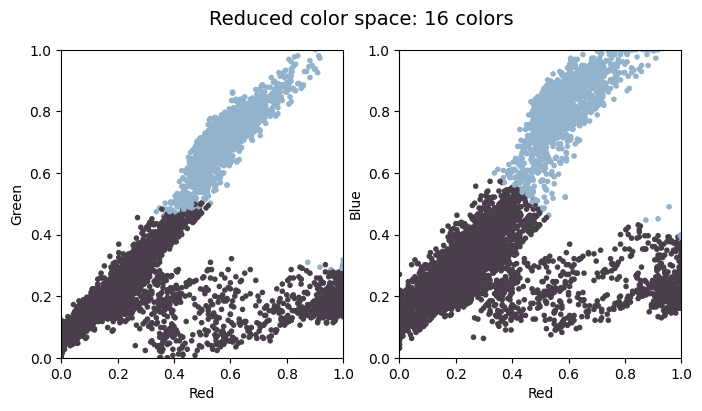

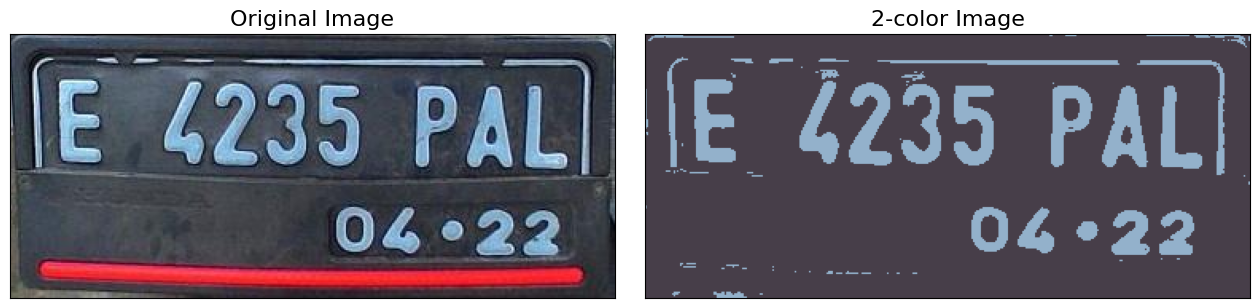

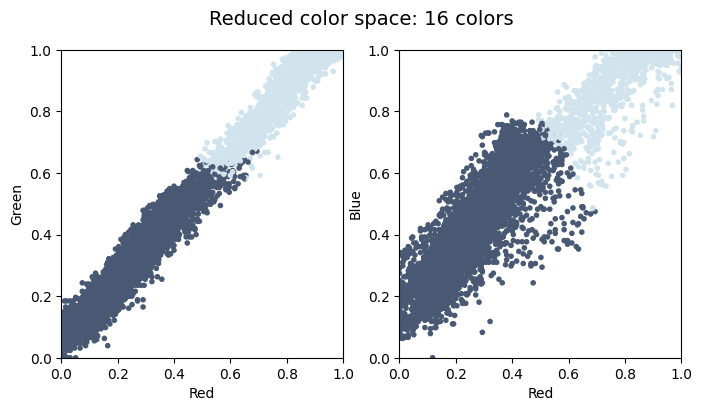

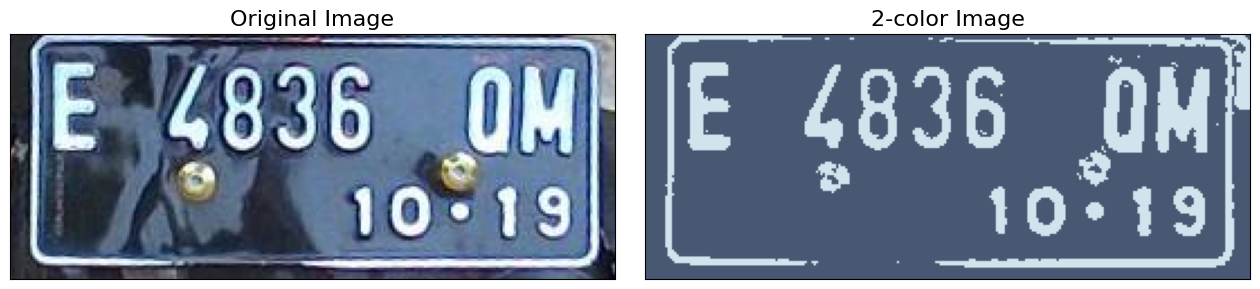

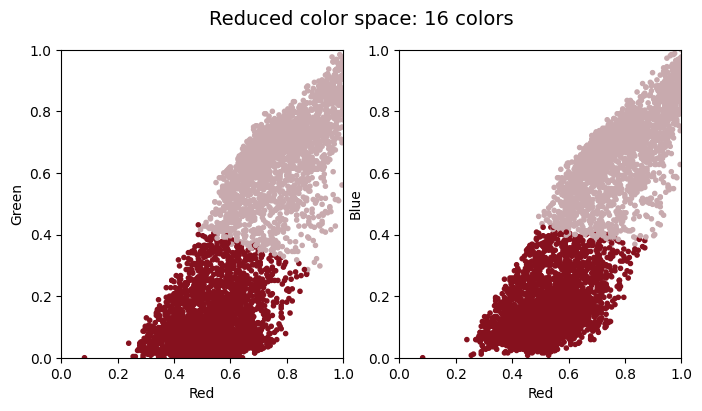

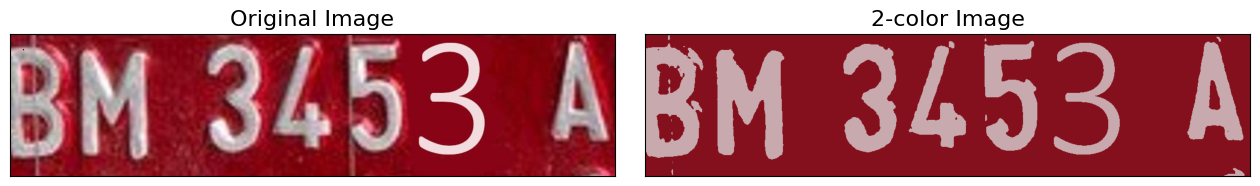

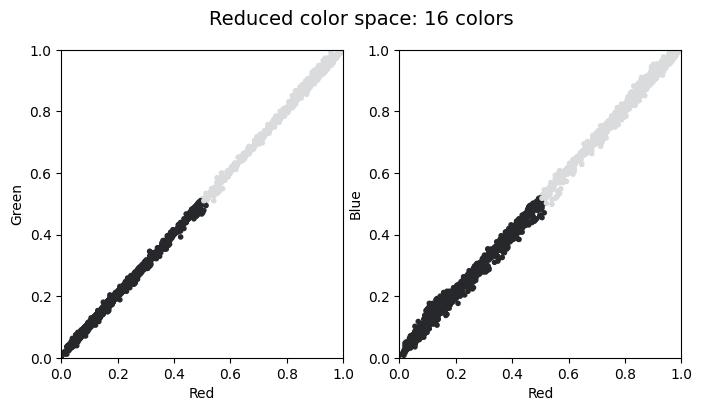

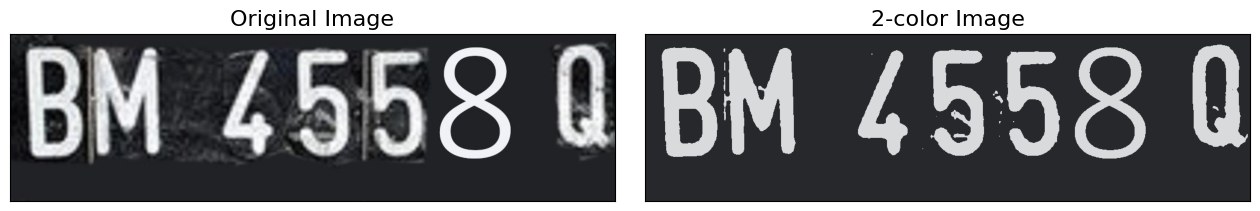

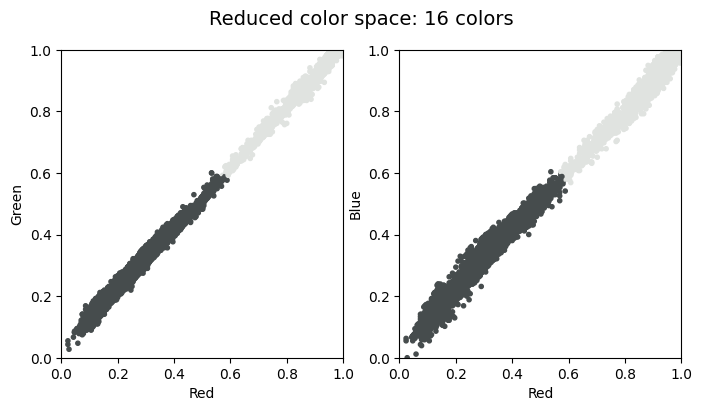

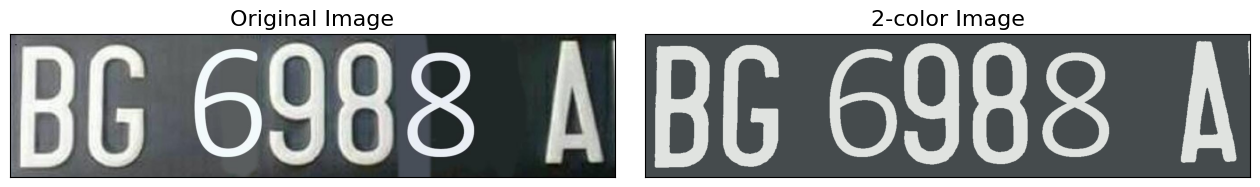

In [18]:
for img in images:
    kmeans_cluster(img)